# Text classification: Understanding the Customer's Feedback

---

Text classification is one of the important tasks of text mining

![alt text](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1535125878/NLTK3_zwbdgg.png)

In this notebook, we will perform Sentiment Analysis on IMDB movies reviews. Sentiment Analysis is the art of extracting people's opinion from digital text. We will use a regression model from Scikit-Learn able to predict the sentiment given a movie review.

We will use [the IMDB movie review dataset](http://ai.stanford.edu/~amaas/data/sentiment/), which consists of 50,000 movies review (50% are positive, 50% are negative).

The libraries needed in this exercise are:
* [Numpy](http://www.numpy.org/) — a package for scientific computing.
* [Pandas](https://pandas.pydata.org/) — a library providing high-performance, easy-to-use data structures and data analysis tools for the Python
* [Matplotlib](https://matplotlib.org/) — a package for plotting & visualizations.
* [scikit-learn](http://scikit-learn.org/stable/index.html) — a tool for data mining and data analysis.
* [NLTK](http://www.nltk.org/) — a platform to work with natural language.

##Loading the data

### Importing the libraries and necessary dictionaries

In [ ]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from tensorflow import keras

# download Punkt Sentence Tokenizer
nltk.download('punkt')
# download stopwords
nltk.download('stopwords')

### Loading the dataset in our directory

In [ ]:
# download IMDB dataset
!wget "https://raw.githubusercontent.com/javaidnabi31/Word-Embeddding-Sentiment-Classification/master/movie_data.csv" -O "movie_data.csv"

# list files in current directory
!ls -lah

###Reading the dataset file and getting info on it
**Question 1:** Use pandas to read the csv file and display the first 5 rows

In [5]:
# path to IMDB dataseet
path = 'movie_data.csv'

# read file (dataset) into our program using pandas
data = pd.read_csv(path)

# display first 5 rows
data.head()

,review,sentiment
0,I went and saw this movie last night after bei...,1
1,Actor turned director Bill Paxton follows up h...,1
2,As a recreational golfer with some knowledge o...,1
3,"I saw this film in a sneak preview, and it is ...",1
4,Bill Paxton has taken the true story of the 19...,1


Getting info on our dataset

In [6]:
#Seeing the info of our dataset
data.info()
#As we can see, there are about 50000 from 0 to 49999
#There are 2 columns one int64 and one object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


A balanced dataset in sentiment analysis is a dataset which holds an equal amount of positive sentiment data and negative sentiment data, meaning 50% of the data is positive and 50% is negative

**Question 2:** Check if dataset is balanced (number of positive sentiment = number of negative sentiment) by plotting the different classes

In [9]:
#To check if the data is balanced or not
data['sentiment'].value_counts()
#We can see that the data is balanced we have the same values in both of them which is a good thing

1    25000
0    25000
Name: sentiment, dtype: int64

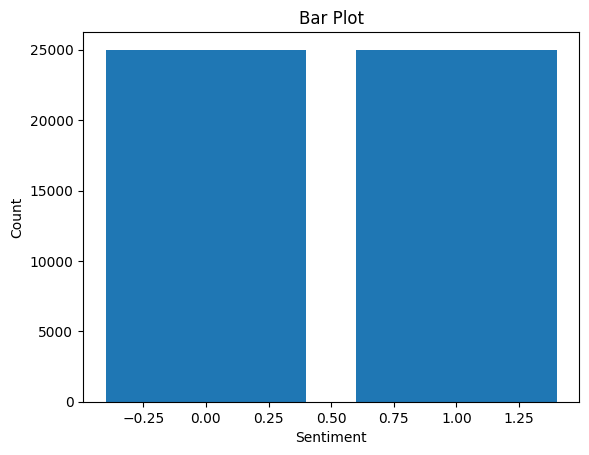

In [11]:
values = data['sentiment'].value_counts()
# Creating a Bar plot
plt.bar(values.index, values.values)

# Adding labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Bar Plot')

# Displaying the bar plot
plt.show()

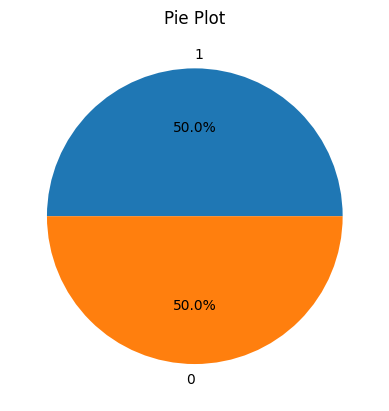

In [12]:
# Creating a Pie plot
plt.pie(values, labels=values.index, autopct='%1.1f%%')

# Adding title
plt.title('Pie Plot')

# Displaying the pie plot
plt.show()

## Text cleaning

In [13]:
print(data.review[10])

I loved this movie from beginning to end.I am a musician and i let drugs get in the way of my some of the things i used to love(skateboarding,drawing) but my friends were always there for me.Music was like my rehab,life support,and my drug.It changed my life.I can totally relate to this movie and i wish there was more i could say.This movie left me speechless to be honest.I just saw it on the Ifc channel.I usually hate having satellite but this was a perk of having satellite.The ifc channel shows some really great movies and without it I never would have found this movie.Im not a big fan of the international films because i find that a lot of the don't do a very good job on translating lines.I mean the obvious language barrier leaves you to just believe thats what they are saying but its not that big of a deal i guess.I almost never got to see this AMAZING movie.Good thing i stayed up for it instead of going to bed..well earlier than usual.lol.I hope you all enjoy the hell of this movi

**Question 3:** Let's define a function that would clean each movie review (sentence)

In [21]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

english_stopwords = stopwords.words('english')
stemmer = PorterStemmer()

# define cleaning function
def clean_review(text):
  #Making the text lower, with lower cases
  text = text.lower()

  text = re.sub(r'[^a-z]', '', text)

  #Now, tokenizing the text, and creating tokens
  tokens = word_tokenize(text)

  #Creating a for loop to stem the words in the tokens
  stemmed = [stemmer.stem(word) for word in tokens]

  #Splitting the text
  split = text.split()

  #Joining the text
  text = ''.join(stemmed)

  text = ' '.join([word for word in text.split() if word not in english_stopwords])

  #Returning the text in the end
  return text

**Question 4 :** Try it out on an instance of the dataset then on the entire dataset.

In [24]:
#Let's see the difference now

#Seeing the data before using the function
data['review'][5]

'I saw this film on September 1st, 2005 in Indianapolis. I am one of the judges for the Heartland Film Festival that screens films for their Truly Moving Picture Award. A Truly Moving Picture "...explores the human journey by artistically expressing hope and respect for the positive values of life." Heartland gave that award to this film.<br /><br />This is a story of golf in the early part of the 20th century. At that time, it was the game of upper class and rich "gentlemen", and working people could only participate by being caddies at country clubs. With this backdrop, this based-on-a-true-story unfolds with a young, working class boy who takes on the golf establishment and the greatest golfer in the world, Harry Vardon.<br /><br />And the story is inspirational. Against all odds, Francis Ouimet (played by Shia LaBeouf of "Holes") gets to compete against the greatest golfers of the U.S. and Great Britain at the 1913 U.S. Open. Francis is ill-prepared, and has a child for a caddy. (T

In [25]:
#Seeing the data after using the function
clean_review(data['review'][5])
#We can notice the difference now

'isawthisfilmonseptemberstinindianapolisiamoneofthejudgesfortheheartlandfilmfestivalthatscreensfilmsfortheirtrulymovingpictureawardatrulymovingpictureexploresthehumanjourneybyartisticallyexpressinghopeandrespectforthepositivevaluesoflifeheartlandgavethatawardtothisfilmbrbrthisisastoryofgolfintheearlypartofthethcenturyatthattimeitwasthegameofupperclassandrichgentlemenandworkingpeoplecouldonlyparticipatebybeingcaddiesatcountryclubswiththisbackdropthisbasedonatruestoryunfoldswithayoungworkingclassboywhotakesonthegolfestablishmentandthegreatestgolferintheworldharryvardonbrbrandthestoryisinspirationalagainstalloddsfrancisouimetplayedbyshialabeoufofholesgetstocompeteagainstthegreatestgolfersoftheusandgreatbritainattheusopenfrancisisillpreparedandhasachildforacaddythecaddyishilariousandmotivationalandstealseverysceneheappearsinbutdespitethesehandicapsfrancisdisplayscouragespiritheroismandhumilityatthisworldclasseventbrbrandwelearnalotabouttheearlyyearsofgolfforexampletheuseofsmallwoodenclubst

And now clean the entire dataset reviews

In [26]:
# apply to all dataset
data['clean_review'] = data['review'].apply(clean_review)
data.head()

,review,sentiment,clean_review
0,I went and saw this movie last night after bei...,1,iwentandsawthismovielastnightafterbeingcoaxedt...
1,Actor turned director Bill Paxton follows up h...,1,actorturneddirectorbillpaxtonfollowsuphispromi...
2,As a recreational golfer with some knowledge o...,1,asarecreationalgolferwithsomeknowledgeofthespo...
3,"I saw this film in a sneak preview, and it is ...",1,isawthisfilminasneakpreviewanditisdelightfulth...
4,Bill Paxton has taken the true story of the 19...,1,billpaxtonhastakenthetruestoryoftheusgolfopena...


## Split dataset for training and testing
We will split our data into two subsets: a 50% subset will be used for training the model for prediction and the remaining 50% will be used for evaluating or testing its performance. The random state ensures reproducibility of the results.

**Question 5:** Split your data to get x_train, x_test, y_train and y_test.

In [27]:
data.columns

Index(['review', 'sentiment', 'clean_review'], dtype='object')

In [30]:
from sklearn.model_selection import train_test_split

X = data['clean_review'].values
y = data['sentiment'].values

# Split data into 50% training & 50% test
# Use a random state of 42 for example to ensure having the same split


#Splitting size
s = 0.5

#Ransom state
r = 101


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=s, random_state=r)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(25000,) (25000,)
(25000,) (25000,)


In [31]:
#Let's see x_train
x_train

array(['afewbuddiesandmyselfhavethestrangehobbyofseekingoutreallyhorrendousandutterlyobscureforagoodreasonhorrorflicksandthensubsequentlywatchingthemundertheinfluenceofmindbroadeningconsumergoodslikealcoholandorsoftdrugssurelyalotofpeopledothisbuttheywatchmovieslikethegodzillaremakewhereaswetormentoureyesandbrainswithstufflikethelochnesshorrorandeurekathisisaprototypicbadmovieweopentraditionallywithbagpipesmusicduringtheopeningcreditsthisisofcoursetoemphasizeextratousdumbviewersthatthestoryissupposedtotakeplaceinthescottishhighlightsandnotindirectorlarrybuchanansbirthplacetexasforthatexactsamereasonthecastmembersareseeminglyalsoinstructedtooveracttremendouslyandtalkwithtalkwithatrociousaccentstheamericanmarinebiologistprofgeorgesandersonarrivesinlochnesswithsomebrandnewandhighlysophisticatedsonarequipmenttotrackdownthewhereaboutsofthelegendarymonsterinthelakemeanwhiletherearemanyotherpartieshangingaroundthelakelikeagroupofkidsonasciencecampwhataboringwaytospendyourvacationretiredarmyge

In [32]:
#Let's see x_test
x_test

array(['igenerallywontreviewmoviesihaventseeninawhilesoillpoptheminorrentthemtogiveafullandfreshtakeonthefilminthecaseofasoundofthunderirememberedmyvowofneverseeingthismovieeveragainsoilljustgoonmemoryinfactihaventthoughtofhowbadlymadethismoviewasuntilireadsomeoneelsesreviewandrememberedtheexperienceihadbackinwheniactuallysawthisinthetheatermymoviebuddyforcedmetoseeitthoughiwasntinterestedandwowlateroniforcedhimtoseebasicinstinctinthetheaterremindinghimhemademeseethiscrapsoiguessthatmadeusevenicertainlyhadmyshareofdeeplaughsatthemoviesexpenseofcoursewhichdidntmakehimhappyashereallywantedtoseeitthetimetravelbutterflyeffectfilmhadsomanybadgraphicstheloudestchucklesfrommewaswhenevertheyshowedthedinosaurgodilovedseeingthatdinoandthemactuallybeingscaredofititwashilariousorjustsimplybenkingsleyitsgreatkingsleycanremindusonhowhumanactorscanbegoingfromgandhiandschindlerslisttouhthisevenamerylstreepcandoashedevilfromtimetotimesotheyreforgivenformonthsipulledanmstkwithmybuddyconsistentlyreferenc

In [33]:
#Let's see y_train
y_train

array([0, 0, 1, ..., 0, 0, 0])

In [34]:
#Let's see y_test
y_test

array([0, 0, 0, ..., 0, 0, 1])

## Feature extraction with Bag of Words


**Question 6:**  In this section, apply the Bag of Words method to learn the vocabulary of your text and with it transform your training input data.

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

# define a CountVectorizer (with binary=True and max_features=10000)
vectorizer = CountVectorizer(binary = True, max_features = 10000)

# learn the vocabulary of all tokens in our training dataset
vectorizer.fit(x_train) #We only fit the training data not the test data

# transform x_train to bag of words
x_train_bow = vectorizer.transform(x_train)
x_test_bow = vectorizer.transform(x_test)

print(x_train_bow.shape, y_train.shape)
print(x_test_bow.shape, y_test.shape)

(25000, 10000) (25000,)
(25000, 10000) (25000,)


## Classification

**Question 7:** Your data is ready for classification. For this task use [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [36]:
from sklearn.linear_model import LogisticRegression

# define the LogisticRegression classifier
model = LogisticRegression()

# train the classifier on the training data
model.fit(x_train_bow, y_train)

# get the mean accuracy on the training data
acc_train = model.score(x_train_bow, y_train)

print('Training Accuracy:', acc_train)
#We can see that, the accuracy is not that good

Training Accuracy: 0.69796


**Question 8:**  Evaluating the performance of your model through its accuracy score

In [37]:
# Evaluate model with test data
acc_test = model.score(x_test_bow, y_test)
print('Test Accuracy:', acc_test)
#We can see that, the accuracy is not that good and even badder than the training score

Test Accuracy: 0.49816


## Bonus: Let's use the model to predict!
To do so, let's create a predict function which takes as argument your model and the bag of words vectorizer together with a review on which it would predict the sentiment. This review should be cleaned with the `clean_review` function we built, transformed by bag of words and then used for prediction with `model.predict()`.

In [45]:
# define predict function
def predict(model, vectorizer, review):
  #Cleaning the review with the function
  review = clean_review(review)

  #Creating the review bow
  review_bow = vectorizer.transform([review])

  #Returning the model to predict
  return model.predict(review_bow)[0]

And let's try it out on an example

In [46]:
review = 'The movie was great!'
predict(model, vectorizer, review)

0